# <font color="purple"><b><ins>Keras Basics</ins></b></font>
> Refer to [this notebook](https://github.com/juspreet51/templates/tree/master/tf_keras/deep_lizard/01_ANN)  <br>
___

__Previously, we could access the Dense module from Keras with the following import statement__
```python
from keras.layers import Dense

```

__Now, using Keras with TensorFlow, the import statement looks like this:__
```python
from tensorflow.keras.layers import Dense
```

___
## <font color="yellow"><b><ins>Major Changes</b></ins></font>
__Before TensorFlow Integration__ <br>
```python
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
```


__After TensorFlow Integration__ <br>
```python
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
```
___

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# <font color="yellow"><b><ins>Data Generation</ins></b></font>
## y=mx+b+noise, i.e. a basic line

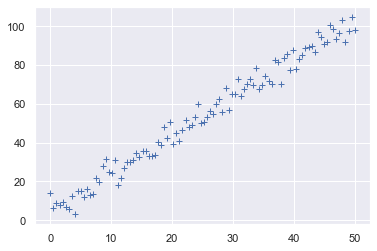

In [3]:
m, b, x = 2, 3, np.linspace(0,50,100) # 100 linearly spaced points between 0-50

np.random.seed(101)
noise = np.random.normal(loc=0,scale=4,size=len(x))  #centered at Zero, with scale or STD of 4 and then size or length of how many noisy elements is equal to x

y = m*x + b + noise 
plt.plot(x,y,"+");

# <font color="yellow"><b><ins>Creating a NN for the best fit line</ins></b></font>
__Building a model__ <br>
Let's first see what we need to do when we want to train a model

- First, we want to decide a model architecture, this is the number of hidden layers and activation functions, etc (___compile___)
- Secondly, we will want to train our model to get all the paramters to the correct value to map our inputs to our outputs (___fit___)
- Lastly, we will want to use this model to do some feed-forward passes to predict novel inputs (___predict___)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
model = Sequential()
model.add(Dense(units=4, input_dim=1, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


### <font color="yellow"><b><ins>Fit the model</ins></b></font>
Train-Test-SPlit not required as we are only trying to find the best-fit line

In [6]:
model.fit(x,y,epochs=290)

Epoch 1/290
4/4 [==============================] - 0s 2ms/step - loss: 295.3768
Epoch 2/290
4/4 [==============================] - 0s 2ms/step - loss: 273.7533
Epoch 3/290
4/4 [==============================] - 0s 2ms/step - loss: 251.4870
Epoch 4/290
4/4 [==============================] - 0s 2ms/step - loss: 231.0049
Epoch 5/290
4/4 [==============================] - 0s 2ms/step - loss: 211.5225
Epoch 6/290
4/4 [==============================] - 0s 2ms/step - loss: 192.8248
Epoch 7/290
4/4 [==============================] - 0s 2ms/step - loss: 174.9192
Epoch 8/290
4/4 [==============================] - 0s 3ms/step - loss: 157.8591
Epoch 9/290
4/4 [==============================] - 0s 3ms/step - loss: 142.3518
Epoch 10/290
4/4 [==============================] - 0s 2ms/step - loss: 128.4981
Epoch 11/290
4/4 [==============================] - 0s 2ms/step - loss: 115.1897
Epoch 12/290
4/4 [==============================] - 0s 2ms/step - loss: 102.9500
Epoch 13/290
4/4 [===================

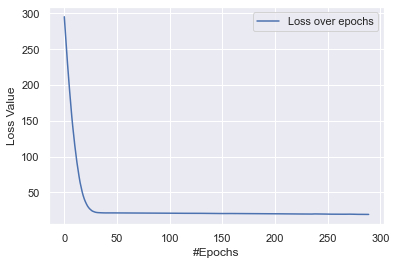

In [7]:
loss =  model.history.history['loss']
epochs = range(len(loss))

plt.plot(epochs,loss)
plt.legend(['Loss over epochs'])
plt.xlabel('#Epochs')
plt.ylabel('Loss Value');

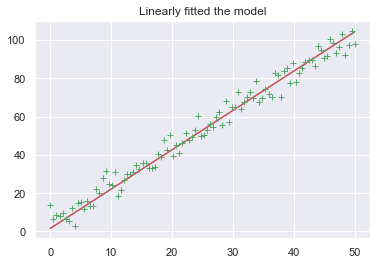

In [8]:
x_for_pred = np.linspace(0,50,100)
y_pred = model.predict(x_for_pred)
plt.plot(x_for_pred,y_pred,color='r')
plt.plot(x,y,"+",color='g')
plt.title("Linearly fitted the model");

### Error Evaluation

In [9]:
from sklearn.metrics import mean_squared_error as mse
error_mse = mse(y, y_pred)
error_mse

19.0814980900429

# <font color="yellow"><b><ins>Next: Recurrent Neural Network</ins></b></font>